In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite") 



In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with = engine)


In [6]:
# View all of the classes that automap found
classnames = base.classes.keys()
print(classnames)


['station', 'measurement']


In [7]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurements.date)).first()
most_recent_date


('2017-08-23',)

Text(0, 0.5, 'Inches')

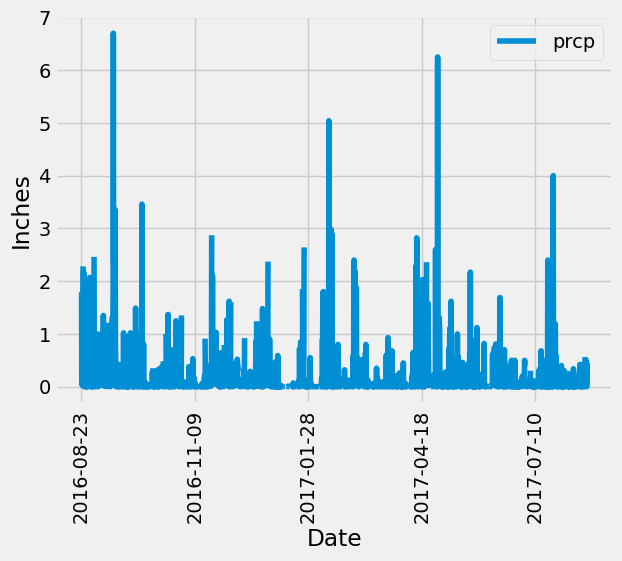

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_date = dt.date(2017, 8, 23)-dt.timedelta(365)
year_date   


# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurements.date, measurements.prcp).filter(measurements.date >= year_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'prcp'])
precipitation_df = precipitation_df.sort_values("Date")


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(stations.station)).scalar()
print("Total Number of Stations:", total_stations)


Total Number of Stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_Measurment_join=session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).\
order_by(func.count(measurements.station).desc()).all()
station_Measurment_join


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

results_temp=session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).\
             filter(measurements.station==station_Measurment_join[0][0]).all()
results_temp


[(54.0, 85.0, 71.66378066378067)]

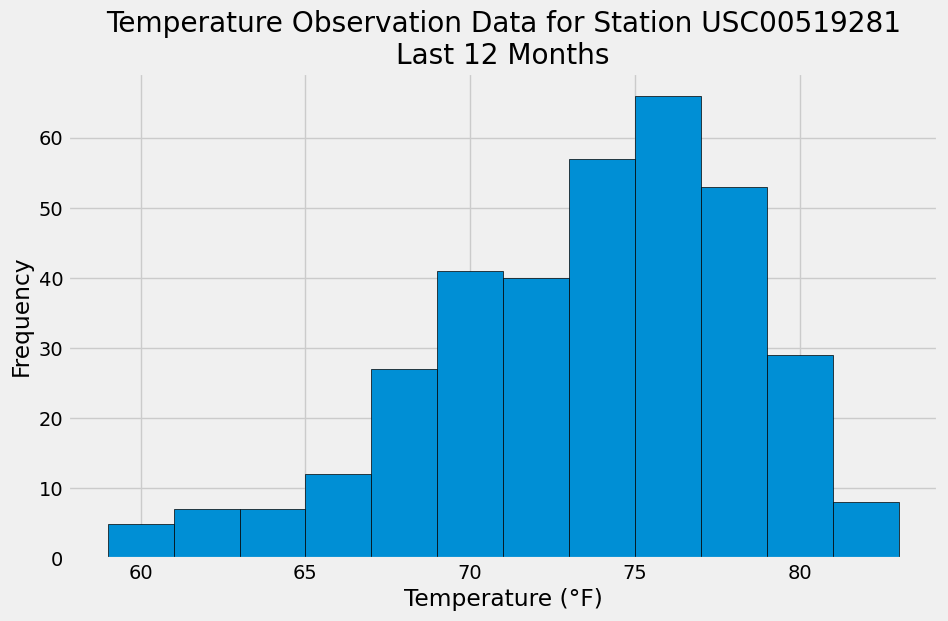

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Extract the most active station ID
most_active_station_id = station_Measurment_join[0][0]

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(measurements.date, measurements.tobs).\
    filter(measurements.station == most_active_station_id).\
    filter(measurements.date >= year_date).all()

# Create a DataFrame from the query results
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observation Data for Station {most_active_station_id}\nLast 12 Months')
plt.show()



# Close Session

In [16]:
# Close Session
session.close()

In [ ]:

# In summary, the majority of days had low or moderate precipitation, with some outliers having significantly higher rainfall. 
# The low median value suggests that, on average, the precipitation levels were relatively modest. However, the presence of a relatively
# high maximum value indicates the possibility of occasional heavy rainfall events. Understanding these statistics helps in assessing 
# the climate conditions for planning a vacation, considering factors like rain gear and potential impact on outdoor activities.


